# Part A

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from numpy.random import randint, rand

# Overall Functions

In [2]:
def selection(pop, scores, k=3):
    """
    Tournament selection
    Randomly select a solution from the population
    Compare it to k-1 other solutions and choose the one with the highest fitness

    :param pop: list of lists
    :param scores: list
    :param k: int
    :return: list
    """
    
    # randomly select candidate
    selection_idx = randint(len(pop))
    
    # compare to k-1 random candidates
    for idx in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[idx] > scores[selection_idx]:
            selection_idx = idx
    return pop[selection_idx]

In [3]:
def crossover(p1, p2, r_cross=0.8):
    """
    One point crossover 
    
    :param p1: list
    :param p2: list
    :param r_cross: float
    :return: list of lists
    """
    
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # generate a random number to use as index for crossover point that is before the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

In [4]:
def mutation(bitstring, r_mut):
    """
    Mutation operator
    
    :param bitstring: list
    :param r_mut: float
    :return: list
    """
    
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]
    return bitstring

In [5]:
def genetic_algorithm(objective, n_bits, n_gen, n_pop, r_cross, r_mut):
    """
    Genetic Algorithm
    
    :param objective: function
    :param n_bits: int
    :param n_gen: int
    :param n_pop: int
    :param r_cross: float
    :param r_mut: float
    :return: list [best solution, fitness, average fitness per generation, maximum fitnes per generation]
    """
    
    # initial population of random bitstring i.e list, of size n_pop, of lists, of size n_bits
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    
    #create lists to graph average fitness
    avg_per_gen = []
    maxs = []
    
    # iterate over n_gen generations
    for gen in range(n_gen):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # append average fitness
        avg_per_gen.append(np.sum(scores)*1.0/n_pop)
        maxs.append(np.max(scores))
        # check for new best solution
        for i in range(n_pop):
            if scores[i] > best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                c = mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    #print(pop[:20])
    return [best, best_eval, avg_per_gen, maxs]

In [6]:
def plot_progression(data):
    """
    Plot Data
    
    :param data: list[number of generations, average fitness per generation, maximum fitnes per generation]
    """
    plt.plot(list(range(data[0])), data[1], label='Mean Fitness')
    plt.plot(list(range(data[0])), data[2], label='Max Fitness')
    plt.legend()
    plt.title('Fitness Results')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.show()

In [7]:
N_BITS = 20
N_GEN = 200
N_POP = 100
R_CROSS =0.8
R_MUT = 0.01

# I

In [8]:
def objective(s):
    """
    Objective Function
    
    :param s: list
    :return: int
    """
    return np.sum(s)

In [9]:
b, b_e, avgs, maxs = genetic_algorithm(objective, N_BITS, N_GEN, N_POP, R_CROSS, R_MUT)

>0, new best f([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0]) = 13.000
>0, new best f([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1]) = 14.000
>0, new best f([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]) = 15.000
>0, new best f([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]) = 16.000
>3, new best f([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]) = 17.000
>3, new best f([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 18.000
>4, new best f([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 19.000
>6, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 20.000


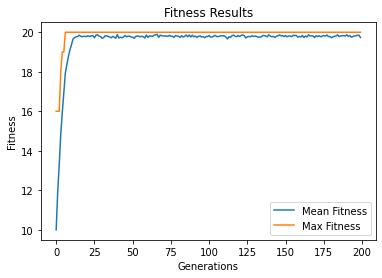

In [10]:
plot_progression([N_GEN, avgs, maxs])

# II

In [11]:
GOAL = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [12]:
def objective(s):
    """
    Objective Function
    
    :param s: list
    :return: int
    """
    count = 0
    for i in range(len(s)):
        if s[i] == GOAL[i]:
            count+=1
    return count

In [13]:
b, b_e, avgs, maxs = genetic_algorithm(objective, N_BITS, N_GEN, N_POP, R_CROSS, R_MUT)

>0, new best f([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]) = 11.000
>0, new best f([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0]) = 12.000
>0, new best f([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]) = 14.000
>0, new best f([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1]) = 15.000
>1, new best f([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]) = 16.000
>2, new best f([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]) = 18.000
>5, new best f([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]) = 19.000
>7, new best f([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]) = 20.000


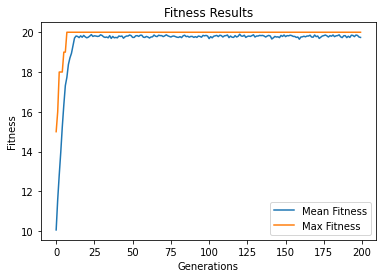

In [14]:
plot_progression([N_GEN, avgs, maxs])

# III

In [15]:
def objective(s):
    """
    Objective Function
    
    :param s: list
    :return: int
    """
    return 2*len(s) if np.sum(s)==0 else np.sum(s)

In [16]:
b, b_e, avgs, maxs = genetic_algorithm(objective, N_BITS, N_GEN, N_POP, R_CROSS, R_MUT)

>0, new best f([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]) = 14.000
>0, new best f([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]) = 15.000
>0, new best f([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]) = 17.000
>4, new best f([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]) = 18.000
>5, new best f([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 19.000
>6, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 20.000


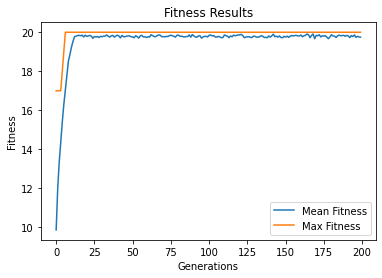

In [17]:
plot_progression([N_GEN, avgs, maxs])